<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/circle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
x[:10],y[:10]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

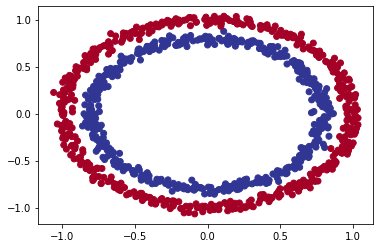

In [61]:
#visualizing the items in their respective axises
circles=pd.DataFrame({"x0:":x[:,0],"x1":x[:,1],"label":y})
circles
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);


In [62]:
x.shape,y.shape

((1000, 2), (1000,))

In [63]:
tf.size(x).numpy()

2000

In [78]:
tf.random.set_seed(42)
circle_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
circle_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr=0.001),
                     metrics="Accuracy")
history=circle_model_1.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 2.9331 - Accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7233 - Accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - Accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - Accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - Accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - Accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - Accuracy: 0.5200
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - Accuracy: 0.5040
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - Accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - Accuracy: 0.4640
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - Accuracy: 0.5100


Text(0.5, 0, 'accuracy')

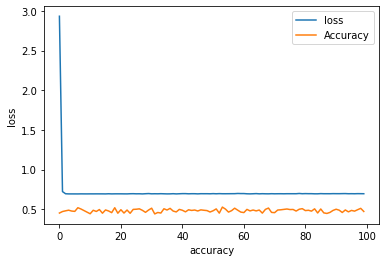

In [79]:
circle_model_1.evaluate(x,y)

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('accuracy')


In [91]:
import numpy as np
def plot_decision_boundary(x,y,model):
  #define axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #use np.c to stack arrays into a column, and ravel to convert to 1D array
  x_in=np.c_[xx.ravel(), yy.ravel()]
  #make predictions
  y_predict = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification")
    y_predict = np.argmax(y_predict, axis=1).reshape(xx.shape)#argmax will output the index of the largest number
  else:
    print("doing binary classification")
    y_predict=np.round(y_predict).reshape(xx.shape)
    #plot the decision boundary
  plt.contourf(xx, yy, y_predict, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


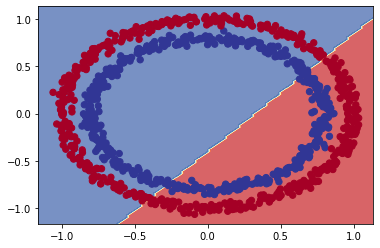

In [92]:
plot_decision_boundary(x,y,circle_model_1)

In [93]:
circle_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(0.001),
                       metrics=["Accuracy"])
history_2=circle_model_2.fit(x,y,epochs=100)
history_2



Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6921 - Accuracy: 0.5110
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - Accuracy: 0.5220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6846 - Accuracy: 0.5110
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - Accuracy: 0.5230
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6782 - Accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6747 - Accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6709 - Accuracy: 0.6860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6672 - Accuracy: 0.6620
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - Accuracy: 0.6740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6577 - Accuracy: 0.6170
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


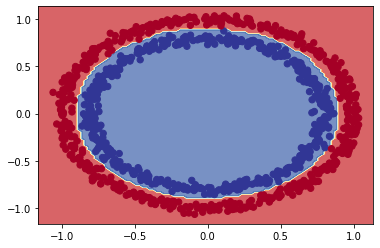

In [94]:
plot_decision_boundary(x,y,model=circle_model_2)